# Distributional Equivalence Tests

In [3]:
#%pip install openturns

In [4]:
import pandas as pd
import openturns as ot
import openturns.viewer as viewer
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

ot.Log.Show(ot.Log.NONE)

## Features

In [5]:
D_mixed = pd.read_csv('./Data/FINAL_DATASET_G12.csv', index_col=0) 
D_mixed

,ipc_all,lag_1,lag_2,lag_3,lag_6,lag_9,lag_12,beef_lp,beef_cb,beef_sc,...,inflacion en bolivia,inflación bolivia,ipc,la inflacion,la inflación,pib,pib bolivia,que es inflacion,que es pib,freq
2010-01-01,NaN,0.263790,0.457498,0.784931,1.447299,5.323961,11.041182,16.000000,17.000000,15.650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
2010-01-02,NaN,0.263790,0.457498,0.784931,1.447299,5.323961,11.041182,16.000000,16.700000,15.690000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
2010-01-03,NaN,0.263790,0.457498,0.784931,1.447299,5.323961,11.041182,16.000000,16.700000,15.690000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
2010-01-04,NaN,0.263790,0.457498,0.784931,1.447299,5.323961,11.041182,16.000000,16.700000,15.690000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
2010-01-05,NaN,0.263790,0.457498,0.784931,1.447299,5.323961,11.041182,16.000000,16.700000,15.690000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,NaN,6.182067,5.192869,3.953707,3.460018,1.863150,2.075432,29.000000,34.500000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
2024-10-29,NaN,6.182067,5.192869,3.953707,3.460018,1.863150,2.075432,30.000000,34.500000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
2024-10-30,NaN,6.182067,5.192869,3.953707,3.460018,1.863150,2.075432,30.670000,34.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
2024-10-31,7.938964,6.182067,5.192869,3.953707,3.460018,1.863150,2.075432,28.524194,25.741935,24.201613,...,93.0,51.0,55.0,35.0,57.0,42.0,29.0,60.0,39.0,month


In [6]:
df_m = D_mixed.copy().query('freq == "month"')
df_m.drop(columns=['freq'], inplace=True)
df_m = df_m.loc[:, 'beef_lp':]

df_w = D_mixed.copy().query('freq == "week"')
df_w.drop(columns=['freq'], inplace=True)
df_w = df_w.loc[:, 'beef_lp':]

df_d = D_mixed.copy().query('freq == "day"')
df_d.drop(columns=['freq'], inplace=True)
df_d = df_d.loc[:, 'beef_lp':'libor']

df_md = df_m.loc[:, 'beef_lp':'libor']
df_mw = df_m.loc['2018-12-31':, ]

df_m.shape, df_w.shape, df_d.shape, df_md.shape, df_mw.shape

((178, 453), (305, 453), (5418, 436), (178, 436), (71, 453))

In [7]:
sample1 = df_md['beef_lp'].values
sample2 = df_d['beef_lp'].values

stats.kstest(sample1, sample2)

KstestResult(statistic=0.03735571399537953, pvalue=0.9621669767707768)

In [8]:
results_daily = {}
for column in df_md.columns:
    sample1 = df_md[column].values
    sample2 = df_d[column].values
    results_daily[column] = stats.kstest(sample1, sample2)

    results_daily_df = pd.DataFrame.from_dict(results_daily, orient='index').reset_index()
    results_daily_df.columns = ['feature', 'statistic', 'pvalue']
    results_daily_df.loc[:, ['statistic', 'pvalue']] = results_daily_df.loc[:, ['statistic', 'pvalue']].round(3)

results_daily_df

,feature,statistic,pvalue
0,beef_lp,0.037,0.962
1,beef_cb,0.045,0.858
2,beef_sc,0.035,0.981
3,beef_or,0.041,0.927
4,beef_po,0.029,0.998
...,...,...,...
431,soy_flour,0.035,0.977
432,soy_oil,0.019,1.000
433,lead,0.038,0.958
434,copper,0.024,1.000


In [9]:
results_daily_df.to_excel('./ks_test_daily.xlsx', index=False)

In [10]:
results_weekly = {}
for column in df_md.columns:
    sample1 = df_md[column].values
    sample2 = df_d[column].values
    results_weekly[column] = stats.kstest(sample1, sample2)

    results_weekly_df = pd.DataFrame.from_dict(results_weekly, orient='index').reset_index()
    results_weekly_df.columns = ['feature', 'statistic', 'pvalue']
    results_weekly_df.loc[:, ['statistic', 'pvalue']] = results_weekly_df.loc[:, ['statistic', 'pvalue']].round(3)

results_weekly_df

,feature,statistic,pvalue
0,beef_lp,0.037,0.962
1,beef_cb,0.045,0.858
2,beef_sc,0.035,0.981
3,beef_or,0.041,0.927
4,beef_po,0.029,0.998
...,...,...,...
431,soy_flour,0.035,0.977
432,soy_oil,0.019,1.000
433,lead,0.038,0.958
434,copper,0.024,1.000


In [11]:
results_weekly_df.to_excel('./ks_test_weekly.xlsx', index=False)

## Target Variable

In [14]:
all_forecast = pd.read_csv('./fORECAST/F3_FORECAST.csv', index_col=0) 
all_forecast.tail(40)

,cpi,ridge,lasso,ada,gbr,rf,et,set,min,max,w_avg,w_avg_best
2024-09-27,NaN,6.488237,5.761154,6.182067,6.314872,5.859222,6.374218,day,5.761154,6.488237,6.237069,6.290403
2024-09-28,NaN,6.513361,5.759994,6.182067,6.378789,5.850298,6.456159,day,5.759994,6.513361,6.269457,6.327291
2024-09-29,NaN,6.484345,5.752832,6.182067,6.326907,5.830700,6.335165,week,5.752832,6.484345,6.225295,6.274607
2024-09-29,NaN,6.505916,5.757269,6.182067,6.378789,5.850298,6.456159,day,5.757269,6.505916,6.266775,6.323212
2024-09-30,6.182067,6.503260,5.763164,6.182067,6.374956,5.886209,6.468890,day,5.763164,6.503260,6.272787,6.327242
2024-10-01,NaN,7.054246,6.589385,7.938964,7.459740,7.113879,7.610004,day,6.589385,7.938964,7.244379,7.122898
2024-10-02,NaN,7.061926,6.592374,7.938964,7.459740,7.128758,7.610004,day,6.592374,7.938964,7.248791,7.127146
2024-10-03,NaN,7.081695,6.600344,7.938964,7.762455,7.128758,7.627573,day,6.600344,7.938964,7.302744,7.143596
2024-10-04,NaN,7.081185,6.599957,7.938964,7.762455,7.128758,7.627573,day,6.599957,7.938964,7.302531,7.143272
2024-10-05,NaN,7.078694,6.598753,7.938964,7.459740,7.128758,7.627573,day,6.598753,7.938964,7.258452,7.141841


In [41]:
target_m = all_forecast.copy().dropna(axis=0)
target_mw = target_m.copy().loc['2019-01-31':, ]

weekly_forecast = all_forecast.copy().query('set == "week"')
daily_forecast = all_forecast.copy().query('set == "day"')

target_m.shape, target_mw.shape, weekly_forecast.shape, daily_forecast.shape

((225, 12), (97, 12), (305, 12), (5418, 12))

### Daily KS Test

In [42]:
sample1 = target_m['cpi'].values
sample2 = daily_forecast['ridge'].values

stats.kstest(sample1, sample2)

KstestResult(statistic=0.044909560723514215, pvalue=0.7581658271060964)

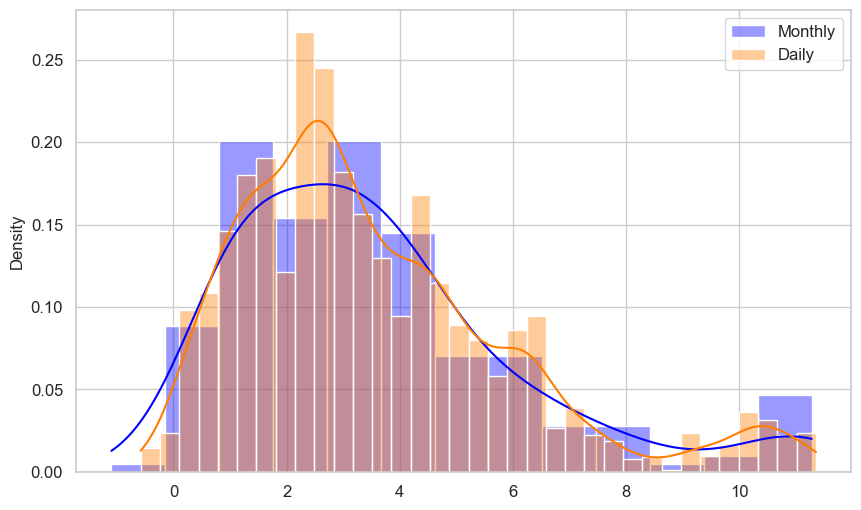

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(sample1, color='blue', kde=True, label='Monthly', stat='density', alpha=0.4)
sns.histplot(sample2, color='#ff7d00', kde=True, label='Daily', stat='density', alpha=0.4)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('distribution_month_day.png')
plt.show()


### Weekly KS Test

In [44]:
sample3 = target_mw['cpi'].values
sample4 = weekly_forecast['ridge'].values

stats.kstest(sample3, sample4)

KstestResult(statistic=0.07088051377387189, pvalue=0.8222482593942453)

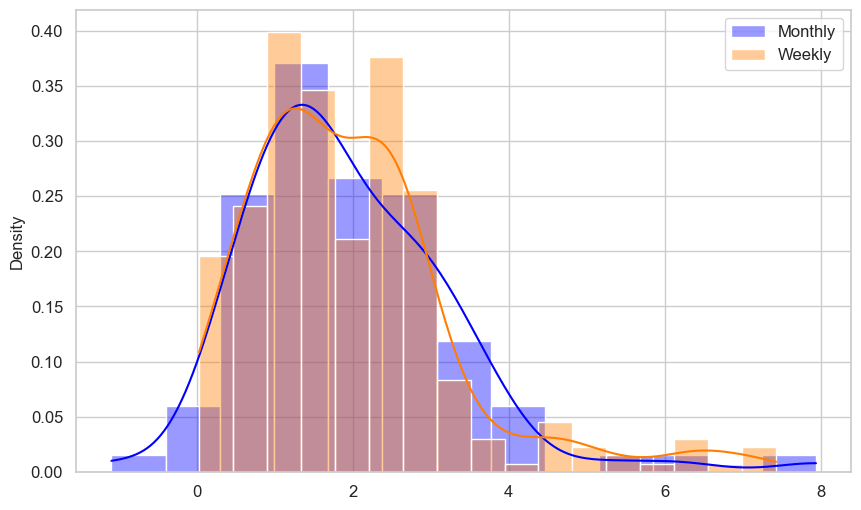

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(sample3, color='blue', kde=True, label='Monthly', stat='density', alpha=0.4)
sns.histplot(sample4, color='#ff7d00', kde=True, label='Weekly', stat='density', alpha=0.4)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('distribution_month_week.png')
plt.show()

In [16]:
target_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 2010-01-31 to 2024-10-31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cpi         225 non-null    float64
 1   ridge       225 non-null    float64
 2   lasso       225 non-null    float64
 3   ada         225 non-null    float64
 4   gbr         225 non-null    float64
 5   rf          225 non-null    float64
 6   et          225 non-null    float64
 7   set         225 non-null    object 
 8   min         225 non-null    float64
 9   max         225 non-null    float64
 10  w_avg       225 non-null    float64
 11  w_avg_best  225 non-null    float64
dtypes: float64(11), object(1)
memory usage: 31.0+ KB


In [17]:
daily_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5418 entries, 2010-01-01 to 2024-10-31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cpi         178 non-null    float64
 1   ridge       5418 non-null   float64
 2   lasso       5418 non-null   float64
 3   ada         5418 non-null   float64
 4   gbr         5418 non-null   float64
 5   rf          5418 non-null   float64
 6   et          5418 non-null   float64
 7   set         5418 non-null   object 
 8   min         5418 non-null   float64
 9   max         5418 non-null   float64
 10  w_avg       5418 non-null   float64
 11  w_avg_best  5418 non-null   float64
dtypes: float64(11), object(1)
memory usage: 550.3+ KB
